In [314]:
import pandas as pd

In [315]:
df = pd.read_csv('/content/jogja_.csv')

In [316]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1495 entries, 0 to 1494
Data columns (total 76 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   lokasi                                               1495 non-null   object 
 1   harga                                                1495 non-null   float64
 2   kamar_tidur                                          1495 non-null   int64  
 3   bangunan                                             1495 non-null   int64  
 4   lahan                                                1492 non-null   float64
 5   alamat                                               1495 non-null   object 
 6   kamar_mandi                                          1495 non-null   int64  
 7   sistem_alarm                                         1495 non-null   object 
 8   gym                                                  1495 non-null  

In [318]:
df.isnull().sum()

lokasi               0
harga                0
kamar_tidur          0
bangunan             0
lahan                3
                    ..
sman_3_yogyakarta    0
jenis_rumah          0
kategori             0
latitude             0
longitude            0
Length: 76, dtype: int64

In [319]:
df = df.dropna()

In [320]:
df.isna().sum()

lokasi               0
harga                0
kamar_tidur          0
bangunan             0
lahan                0
                    ..
sman_3_yogyakarta    0
jenis_rumah          0
kategori             0
latitude             0
longitude            0
Length: 76, dtype: int64

In [321]:
df.duplicated().sum()

68

In [322]:
df = df.drop_duplicates()

In [323]:
df.duplicated().sum()

0

In [324]:
df.describe()

,harga,kamar_tidur,bangunan,lahan,kamar_mandi,latitude,longitude
count,1.424000e+03,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000
mean,3.422094e+09,5.203652,214.615169,295.830758,3.622191,-7.813439,110.377023
std,9.444396e+09,10.073760,239.706566,950.061525,5.376005,0.040928,0.025306
min,1.189210e+08,1.000000,1.000000,45.000000,1.000000,-8.035127,110.350447
25%,8.980000e+08,3.000000,80.000000,108.000000,2.000000,-7.818068,110.359723
50%,1.700000e+09,4.000000,150.000000,150.000000,3.000000,-7.814378,110.372558
75%,3.000000e+09,5.000000,259.250000,317.500000,4.000000,-7.801195,110.387374
max,3.000000e+11,325.000000,4006.000000,34000.000000,150.000000,-7.780455,110.490835


In [325]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [326]:
def format_price(value,pos):
  milyar = '{:.1f}B'.format(value * 1e-9) if value >= 1e9 else ''
  juta = '{:.1f}M'.format(value * 1e-6) if 1e6 <= value <= 1e9 else ''
  ribu = '{:.1f}K'.format(value * 1e-3) if 1e3 <= value < 1e6 else ''

  return '{}{}{}'.format(milyar,juta,ribu)

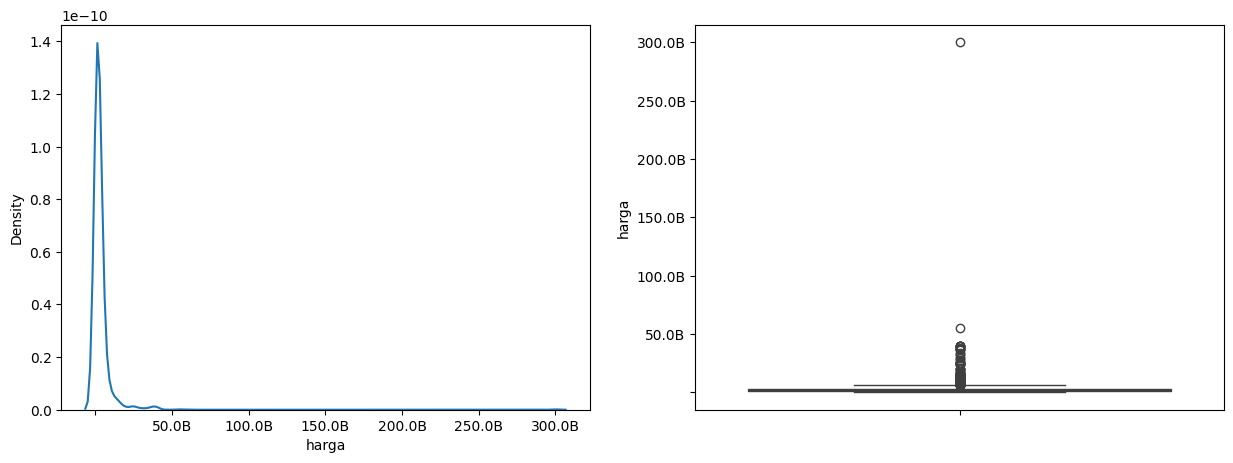

In [327]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.kdeplot(df['harga'])
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_price))
# plt.gca().yaxis.set_major_formatter(FuncFormatter(format_price))
plt.subplot(1,2,2)
sns.boxplot(df['harga'])
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_price))
plt.show()

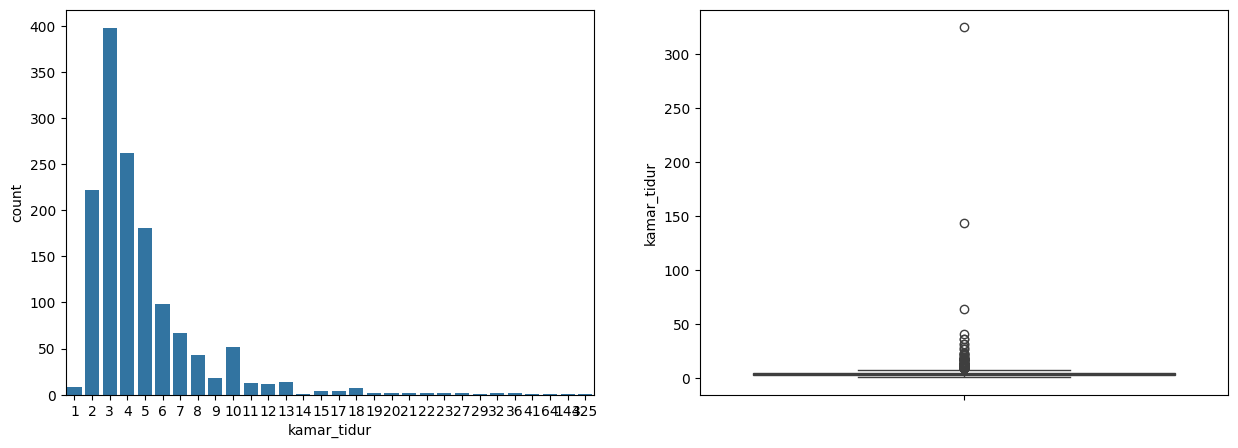

In [328]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=df,x='kamar_tidur')
plt.subplot(1,2,2)
sns.boxplot(df['kamar_tidur'])
plt.show()

In [329]:
import plotly.express as px

In [330]:
fig = px.scatter(df,x='kamar_tidur',y='harga',
                 title='Kamar Tidur dan Harga',
                 color='harga')
fig.show()

In [331]:
df[df['kamar_tidur']>300]

,lokasi,harga,kamar_tidur,bangunan,lahan,alamat,kamar_mandi,sistem_alarm,gym,internet_broadband/wifi,...,universitas_islam_negeri_sunan_kalijaga,gereja_saint_francis_xaverius_yogyakarta,sahid_j-walk,rumah_sakit_panti_rapih,universitas_sanata_dharma_yogyakarta,sman_3_yogyakarta,jenis_rumah,kategori,latitude,longitude
1034,Jetis,3.000000e+09,325,263,325.0,"Jalan A M Sangaji, Yogyakarta, Indonesia Jetis...",5,N,N,Y,...,N,N,N,N,N,N,rumah,premium,-8.035127,110.490835


In [332]:
median_value = df['kamar_tidur'].median()
median_value

4.0

In [333]:
idx = df[df['kamar_tidur'] == 325].index
df.loc[idx, 'kamar_tidur'] = median_value

In [334]:
df[df['kamar_tidur']> 140]

,lokasi,harga,kamar_tidur,bangunan,lahan,alamat,kamar_mandi,sistem_alarm,gym,internet_broadband/wifi,...,universitas_islam_negeri_sunan_kalijaga,gereja_saint_francis_xaverius_yogyakarta,sahid_j-walk,rumah_sakit_panti_rapih,universitas_sanata_dharma_yogyakarta,sman_3_yogyakarta,jenis_rumah,kategori,latitude,longitude
119,Gondomanan,3.000000e+11,144,1971,1971.0,"malioboro yogykarta Gondomanan, Yogyakarta",150,Y,Y,Y,...,N,N,N,N,N,N,rumah,biasa,-7.802395,110.366112


In [335]:
idx = df[df['kamar_tidur'] == 144].index
df = df.drop([119])

In [336]:
df[df['kamar_tidur'] > 50]

,lokasi,harga,kamar_tidur,bangunan,lahan,alamat,kamar_mandi,sistem_alarm,gym,internet_broadband/wifi,...,universitas_islam_negeri_sunan_kalijaga,gereja_saint_francis_xaverius_yogyakarta,sahid_j-walk,rumah_sakit_panti_rapih,universitas_sanata_dharma_yogyakarta,sman_3_yogyakarta,jenis_rumah,kategori,latitude,longitude
1326,Mantrijeron,1.250000e+10,64,2000,850.0,"Jalan Mantrijeron Mantrijeron, Yogyakarta",64,N,N,Y,...,N,N,N,N,N,N,kost,biasa,-7.818068,110.359723


In [337]:
idx = df[df['kamar_tidur'] == 64].index
df = df.drop([1326])

In [338]:
df[df['kamar_tidur'] > 40]

,lokasi,harga,kamar_tidur,bangunan,lahan,alamat,kamar_mandi,sistem_alarm,gym,internet_broadband/wifi,...,universitas_islam_negeri_sunan_kalijaga,gereja_saint_francis_xaverius_yogyakarta,sahid_j-walk,rumah_sakit_panti_rapih,universitas_sanata_dharma_yogyakarta,sman_3_yogyakarta,jenis_rumah,kategori,latitude,longitude
806,Umbulharjo,2.500000e+10,41,2900,2084.0,"Pandeyan Kel., Umbulharjo, Yogyakarta, Indones...",43,Y,N,Y,...,N,N,N,N,N,N,rumah,biasa,-7.814378,110.387374


In [339]:
idx = df[df['kamar_tidur'] == 41].index
df = df.drop([806])

In [340]:
df[df['kamar_tidur'] > 25]

,lokasi,harga,kamar_tidur,bangunan,lahan,alamat,kamar_mandi,sistem_alarm,gym,internet_broadband/wifi,...,universitas_islam_negeri_sunan_kalijaga,gereja_saint_francis_xaverius_yogyakarta,sahid_j-walk,rumah_sakit_panti_rapih,universitas_sanata_dharma_yogyakarta,sman_3_yogyakarta,jenis_rumah,kategori,latitude,longitude
52,Umbulharjo,7.200000e+09,32,342,695.0,"Umbulharjo, Yogyakarta, Indonesia Umbulharjo, ...",7,N,N,Y,...,N,N,N,N,N,N,rumah,biasa,-7.814378,110.387374
53,Umbulharjo,5.400000e+09,27,902,445.0,"Umbulharjo, Yogyakarta, Indonesia Umbulharjo, ...",18,N,N,Y,...,N,N,N,N,N,N,homestay,biasa,-7.814378,110.387374
434,Yogyakarta,5.900000e+09,36,303,1016.0,Yogyakarta,36,N,N,N,...,N,N,N,N,N,N,kost,biasa,-7.801195,110.364917
454,Wirobrajan,5.500000e+10,36,1200,1900.0,"Pringgokusuman Kel., Gedong Tengen, Yogyakarta...",38,N,N,N,...,N,N,N,N,N,N,rumah,biasa,-7.802624,110.350447
517,Tegalrejo,7.200000e+09,32,343,695.0,"Tegalrejo, Yogyakarta, Indonesia Tegalrejo, Yo...",7,N,N,Y,...,N,N,N,N,N,N,rumah,biasa,-7.780455,110.355073
519,Tegalrejo,5.400000e+09,27,907,453.0,"Tegalrejo, Yogyakarta, Indonesia Tegalrejo, Yo...",18,N,N,Y,...,N,N,N,N,N,N,homestay,biasa,-7.780455,110.355073
1215,Gondokusuman,8.000000e+09,29,700,736.0,"Jalan Terban, Yogyakarta 55223, Indonesia Gond...",27,N,N,Y,...,N,N,N,N,N,N,kost,biasa,-7.786744,110.381000


In [341]:
idx = df[df['kamar_tidur'] > 25].index
df = df.drop([82,53,434,454,517,519,1215])

In [342]:
df[df['kamar_tidur'] > 30]

,lokasi,harga,kamar_tidur,bangunan,lahan,alamat,kamar_mandi,sistem_alarm,gym,internet_broadband/wifi,...,universitas_islam_negeri_sunan_kalijaga,gereja_saint_francis_xaverius_yogyakarta,sahid_j-walk,rumah_sakit_panti_rapih,universitas_sanata_dharma_yogyakarta,sman_3_yogyakarta,jenis_rumah,kategori,latitude,longitude
52,Umbulharjo,7.200000e+09,32,342,695.0,"Umbulharjo, Yogyakarta, Indonesia Umbulharjo, ...",7,N,N,Y,...,N,N,N,N,N,N,rumah,biasa,-7.814378,110.387374


In [343]:
idx = df[df['kamar_tidur'] == 32].index
df = df.drop([52])

In [344]:
fig = px.scatter(df,x='kamar_tidur',y='harga',
                 title='Kamar Tidur dan Harga',
                 color='harga')
fig.show()

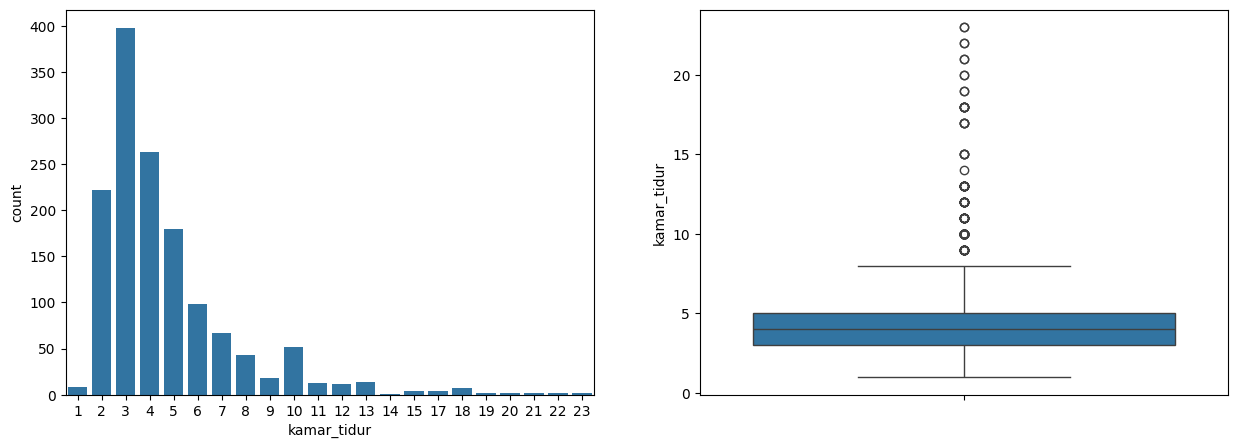

In [345]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=df,x='kamar_tidur')
plt.subplot(1,2,2)
sns.boxplot(df['kamar_tidur'])
plt.show()

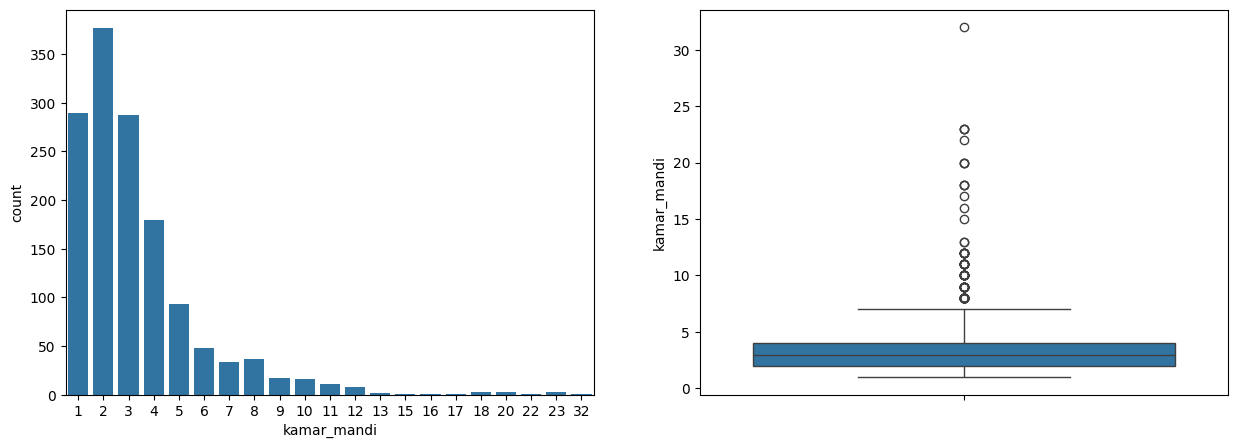

In [346]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=df,x='kamar_mandi')
plt.subplot(1,2,2)
sns.boxplot(df['kamar_mandi'])
plt.show()

In [347]:
fig = px.scatter(df,x='kamar_mandi',y='harga',
                 title='Kamar mandi dan Harga',
                 color='harga')
fig.show()

In [348]:
df[df['kamar_mandi']== 32 ]

,lokasi,harga,kamar_tidur,bangunan,lahan,alamat,kamar_mandi,sistem_alarm,gym,internet_broadband/wifi,...,universitas_islam_negeri_sunan_kalijaga,gereja_saint_francis_xaverius_yogyakarta,sahid_j-walk,rumah_sakit_panti_rapih,universitas_sanata_dharma_yogyakarta,sman_3_yogyakarta,jenis_rumah,kategori,latitude,longitude
590,Tegalrejo,1.500000e+09,5,250,150.0,"Tegalrejo, Yogyakarta",32,N,N,N,...,N,N,N,N,N,N,rumah,biasa,-7.780455,110.355073


In [349]:
idx = df[df['kamar_mandi'] == 32].index
df = df.drop([590])

In [350]:
fig = px.scatter(df,x='kamar_mandi',y='harga',
                 title='Kamar mandi dan Harga',
                 color='harga')
fig.show()

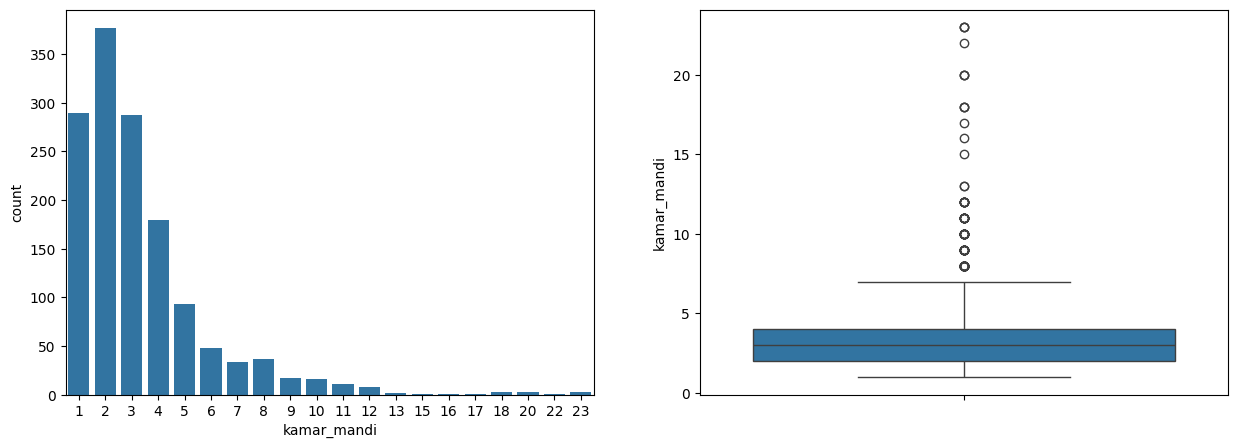

In [351]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=df,x='kamar_mandi')
plt.subplot(1,2,2)
sns.boxplot(df['kamar_mandi'])
plt.show()

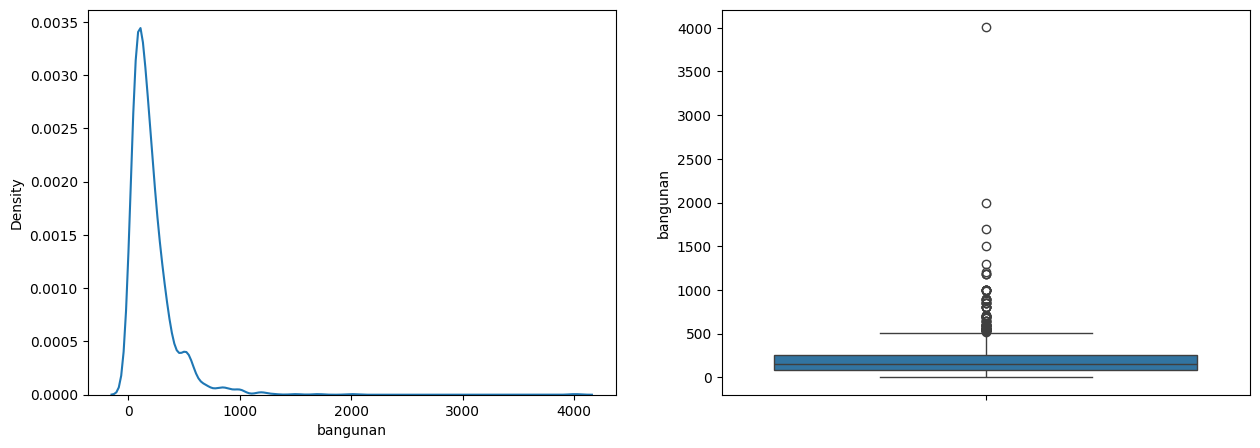

In [352]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.kdeplot(df['bangunan'])
plt.subplot(1,2,2)
sns.boxplot(df['bangunan'])
plt.show()

In [353]:
fig = px.scatter(df,x='bangunan',y='harga',
                 title='Bangunan dan Harga',
                 color='harga')
fig.show()

In [354]:
df[df['bangunan']== 4006 ]

,lokasi,harga,kamar_tidur,bangunan,lahan,alamat,kamar_mandi,sistem_alarm,gym,internet_broadband/wifi,...,universitas_islam_negeri_sunan_kalijaga,gereja_saint_francis_xaverius_yogyakarta,sahid_j-walk,rumah_sakit_panti_rapih,universitas_sanata_dharma_yogyakarta,sman_3_yogyakarta,jenis_rumah,kategori,latitude,longitude
565,Yogyakarta,6.902500e+09,4,4006,1255.0,"Dekat Soto Sapi Mbah Guno, Jl. Wonosari No.KM,...",2,N,N,N,...,N,N,N,N,N,N,rumah,biasa,-7.801195,110.364917


In [355]:
idx = df[df['kamar_mandi'] == 4006 ].index
df = df.drop([565])

In [356]:
df[df['bangunan']==2000]

,lokasi,harga,kamar_tidur,bangunan,lahan,alamat,kamar_mandi,sistem_alarm,gym,internet_broadband/wifi,...,universitas_islam_negeri_sunan_kalijaga,gereja_saint_francis_xaverius_yogyakarta,sahid_j-walk,rumah_sakit_panti_rapih,universitas_sanata_dharma_yogyakarta,sman_3_yogyakarta,jenis_rumah,kategori,latitude,longitude
1101,Wirobrajan,2.000000e+10,17,2000,1150.0,"Wirobrajan, Yogyakarta",20,N,N,Y,...,N,N,N,N,N,N,rumah,biasa,-7.802624,110.350447


In [357]:
df[df['bangunan'] < 20]

,lokasi,harga,kamar_tidur,bangunan,lahan,alamat,kamar_mandi,sistem_alarm,gym,internet_broadband/wifi,...,universitas_islam_negeri_sunan_kalijaga,gereja_saint_francis_xaverius_yogyakarta,sahid_j-walk,rumah_sakit_panti_rapih,universitas_sanata_dharma_yogyakarta,sman_3_yogyakarta,jenis_rumah,kategori,latitude,longitude
136,Umbulharjo,5.250000e+08,3,1,75.0,"Umbulharjo, Yogyakarta",2,N,N,N,...,N,N,N,N,N,N,rumah,biasa,-7.814378,110.387374
159,Umbulharjo,1.200000e+09,10,2,228.0,"Umbulharjo, Yogyakarta",5,N,N,N,...,N,N,N,N,N,N,rumah,biasa,-7.814378,110.387374
160,Jetis,3.500000e+08,3,2,63.0,"Jetis, Yogyakarta",2,N,N,N,...,N,N,N,N,N,N,rumah,biasa,-8.035127,110.490835
168,Mantrijeron,2.100000e+09,3,1,190.0,"Mantrijeron, Yogyakarta",2,N,N,N,...,N,N,N,N,N,N,rumah,biasa,-7.818068,110.359723
187,Umbulharjo,5.000000e+09,18,2,431.0,"Umbulharjo, Yogyakarta",18,N,N,N,...,N,N,N,N,N,N,rumah,biasa,-7.814378,110.387374
203,Kotagede,4.500000e+08,10,1,111.0,"Gang Manuk Beri, Rejowinangun Kel., Kotagede, ...",10,N,N,Y,...,N,N,N,N,N,N,kost,biasa,-7.818311,110.397941
204,Wirobrajan,7.500000e+08,5,2,92.0,"Wirobrajan, Yogyakarta",2,N,N,N,...,N,N,N,N,N,N,kost,biasa,-7.802624,110.350447
265,Wirobrajan,4.665000e+08,2,1,76.0,"Umbulmartani Kel., Ngemplak, Sleman, Indonesia...",1,N,N,N,...,N,N,N,N,N,N,rumah,biasa,-7.802624,110.350447
837,Kotagede,6.900000e+08,2,1,111.0,"Rejowinangun Kel., Kotagede, Yogyakarta, Indon...",1,N,N,N,...,N,N,N,N,N,N,rumah,biasa,-7.818311,110.397941
1076,Yogyakarta,1.950000e+09,3,1,148.0,Yogyakarta,2,N,Y,N,...,N,N,N,N,N,N,rumah,premium,-7.801195,110.364917


In [358]:
median_value = df['bangunan'].median()
median_value

150.0

In [359]:
idx = df[df['bangunan'] < 20].index
df.loc[idx, 'bangunan'] = median_value

In [360]:
df[df['bangunan'] >= 1000]

,lokasi,harga,kamar_tidur,bangunan,lahan,alamat,kamar_mandi,sistem_alarm,gym,internet_broadband/wifi,...,universitas_islam_negeri_sunan_kalijaga,gereja_saint_francis_xaverius_yogyakarta,sahid_j-walk,rumah_sakit_panti_rapih,universitas_sanata_dharma_yogyakarta,sman_3_yogyakarta,jenis_rumah,kategori,latitude,longitude
131,Gondokusuman,4.000000e+10,13,1185,1000.0,"Kotabaru Kel., Gondokusuman, Yogyakarta, Indon...",7,N,N,N,...,N,N,N,N,N,N,rumah,biasa,-7.786744,110.381000
163,Gondokusuman,1.300000e+10,10,1700,2650.0,"Gondokusuman, Yogyakarta",10,N,N,N,...,N,N,N,N,N,N,rumah,biasa,-7.786744,110.381000
643,Pakualaman,3.700000e+10,8,1500,2500.0,"Pakualaman, Yogyakarta",7,N,N,N,...,N,N,N,N,N,N,rumah,biasa,-7.800434,110.376227
697,Gondokusuman,4.000000e+10,13,1185,996.0,"Jalan Jenderal Sudirman, Yogyakarta, Indonesia...",8,N,N,N,...,N,N,N,N,N,N,rumah,premium,-7.786744,110.381000
770,Gondokusuman,4.000000e+10,13,1185,996.0,"Gondokusuman, Yogyakarta, Indonesia Gondokusum...",7,N,N,N,...,N,N,N,N,N,N,rumah,premium,-7.786744,110.381000
788,Mergangsan,1.350000e+10,14,1000,2455.0,"Mergangsan, Yogyakarta",6,N,N,N,...,N,N,N,N,N,N,kost,biasa,-7.814734,110.372558
993,Gondokusuman,4.000000e+10,9,1300,996.0,"Gondokusuman, Yogyakarta",6,N,N,N,...,N,N,N,N,N,N,rumah,biasa,-7.786744,110.381000
1056,Gondokusuman,3.999000e+09,6,1000,744.0,"Gondokusuman, Yogyakarta, Indonesia Gondokusum...",6,N,N,N,...,N,N,N,N,N,N,rumah,premium,-7.786744,110.381000
1068,Yogyakarta,1.300000e+10,10,1200,455.0,Yogyakarta,9,N,N,N,...,N,N,N,N,N,N,kost,biasa,-7.801195,110.364917
1101,Wirobrajan,2.000000e+10,17,2000,1150.0,"Wirobrajan, Yogyakarta",20,N,N,Y,...,N,N,N,N,N,N,rumah,biasa,-7.802624,110.350447


In [361]:
idx = df[df['kamar_mandi'] >= 1000].index
df = df.drop([131,163,643,697,770,788,993,1056,1068,1101,1107,1127,1361,1375])

In [362]:
fig = px.scatter(df,x='bangunan',y='harga',
                 title='Bangunan dan Harga',
                 color='harga')
fig.show()

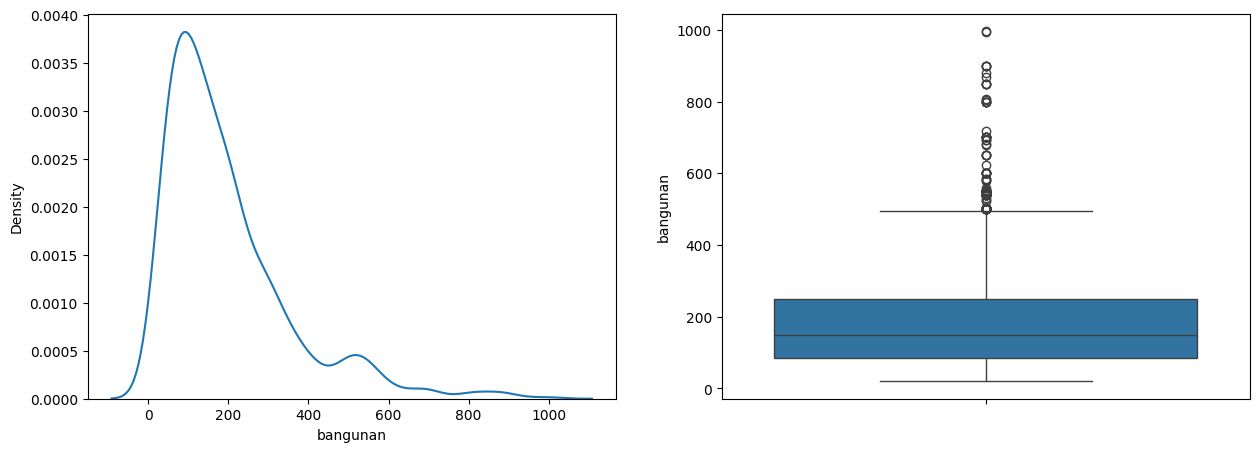

In [363]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.kdeplot(df['bangunan'])
plt.subplot(1,2,2)
sns.boxplot(df['bangunan'])
plt.show()

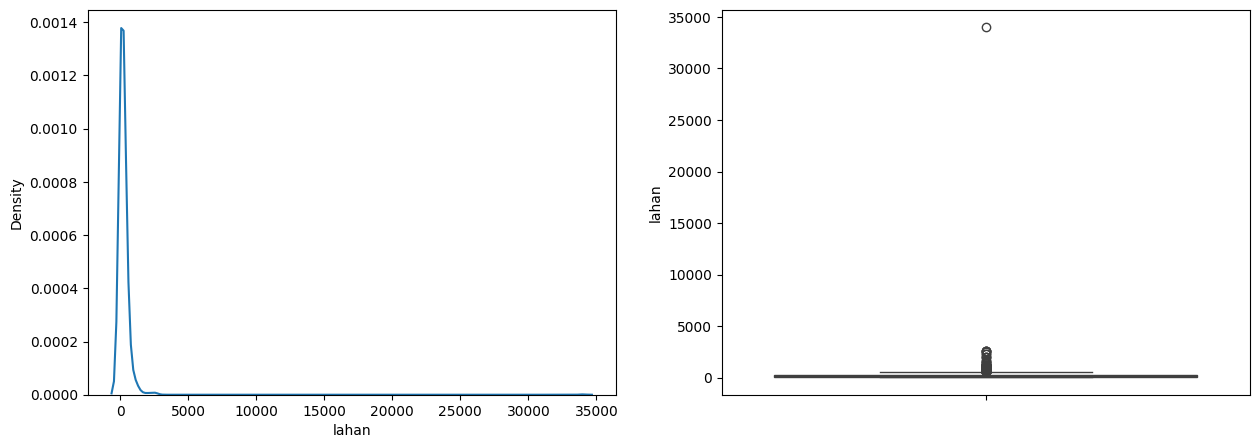

In [364]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.kdeplot(df['lahan'])
plt.subplot(1,2,2)
sns.boxplot(df['lahan'])
plt.show()

In [365]:
fig = px.scatter(df, x="lahan", y="harga",
                 title="Lahan dan Harga",
                color="harga"
                )
fig.show()

In [366]:
df[df['lahan']==34000]

,lokasi,harga,kamar_tidur,bangunan,lahan,alamat,kamar_mandi,sistem_alarm,gym,internet_broadband/wifi,...,universitas_islam_negeri_sunan_kalijaga,gereja_saint_francis_xaverius_yogyakarta,sahid_j-walk,rumah_sakit_panti_rapih,universitas_sanata_dharma_yogyakarta,sman_3_yogyakarta,jenis_rumah,kategori,latitude,longitude
1230,Yogyakarta,9.950000e+09,4,550,34000.0,Yogyakarta,3,N,N,N,...,N,N,N,N,N,N,rumah,premium,-7.801195,110.364917


In [367]:
idx = df[df['kamar_mandi'] == 34000 ].index
df = df.drop([1230])

In [368]:
df[df['lahan']>= 1500]

,lokasi,harga,kamar_tidur,bangunan,lahan,alamat,kamar_mandi,sistem_alarm,gym,internet_broadband/wifi,...,universitas_islam_negeri_sunan_kalijaga,gereja_saint_francis_xaverius_yogyakarta,sahid_j-walk,rumah_sakit_panti_rapih,universitas_sanata_dharma_yogyakarta,sman_3_yogyakarta,jenis_rumah,kategori,latitude,longitude
189,Umbulharjo,3.200000e+10,4,800,2270.0,"Umbulharjo, Yogyakarta, Indonesia Umbulharjo, ...",4,N,N,N,...,N,N,N,N,N,N,rumah,biasa,-7.814378,110.387374
266,Mergangsan,2.950000e+10,4,348,2540.0,"Mergangsan, Yogyakarta",3,N,N,N,...,N,N,N,N,N,N,rumah,biasa,-7.814734,110.372558
503,Mantrijeron,3.800000e+10,8,500,1500.0,"Jalan Tirtodipuran, Mantrijeron Kel., Mantrije...",4,N,N,N,...,N,N,N,N,N,N,rumah,biasa,-7.818068,110.359723
561,Umbulharjo,1.850000e+10,12,900,2021.0,"Muja Muju Kel., Umbulharjo, Yogyakarta, Indone...",12,N,N,N,...,Y,N,N,N,N,N,rumah,biasa,-7.814378,110.387374
580,Umbulharjo,3.400000e+10,6,500,2270.0,"Jl. Timoho No.70a, Muja Muju, Kec. Umbulharjo,...",3,N,N,N,...,N,N,N,N,N,N,rumah,biasa,-7.814378,110.387374
1051,Yogyakarta,2.950000e+10,4,400,2600.0,Yogyakarta,6,N,N,N,...,N,N,N,N,N,N,rumah,biasa,-7.801195,110.364917
1095,Kraton,6.500000e+09,7,500,1548.0,"Pakem, Sleman, Yogyakarta Kraton, Yogyakarta",7,N,N,N,...,N,Y,N,N,N,N,rumah,biasa,-7.808799,110.362726
1186,Umbulharjo,4.000000e+10,4,300,1597.0,"Jl. Ipda Tut Harsono, Muja Muju, Kec. Umbulhar...",4,N,N,N,...,N,N,N,N,N,N,rumah,premium,-7.814378,110.387374
1203,Umbulharjo,1.700000e+10,12,900,2021.0,"Jl. Timoho No.40, Muja Muju, Kec. Umbulharjo, ...",12,N,N,N,...,N,N,N,N,N,N,rumah,biasa,-7.814378,110.387374
1214,Tegalrejo,3.300000e+10,10,600,1700.0,"Tegalrejo, Yogyakarta, Indonesia Tegalrejo, Yo...",6,N,N,Y,...,N,N,N,N,N,N,rumah,biasa,-7.780455,110.355073


In [369]:
idx = df[df['kamar_mandi'] >= 1500 ].index
df = df.drop([189,266,503,561,580,1051,1095,1186,1203,1214,1367,1372,1373,1440])

In [370]:
df[df['lahan']>= 1400]

,lokasi,harga,kamar_tidur,bangunan,lahan,alamat,kamar_mandi,sistem_alarm,gym,internet_broadband/wifi,...,universitas_islam_negeri_sunan_kalijaga,gereja_saint_francis_xaverius_yogyakarta,sahid_j-walk,rumah_sakit_panti_rapih,universitas_sanata_dharma_yogyakarta,sman_3_yogyakarta,jenis_rumah,kategori,latitude,longitude
287,Kotagede,2.700000e+09,3,105,1423.0,"Kotagede, Yogyakarta, Indonesia Kotagede, Yogy...",3,N,N,Y,...,N,N,N,N,N,N,rumah,biasa,-7.818311,110.397941
1444,Gondokusuman,1.700000e+10,21,700,1430.0,"Gondokusuman, Yogyakarta",23,N,N,N,...,N,N,N,N,N,N,rumah,biasa,-7.786744,110.381000


In [371]:
idx = df[df['kamar_mandi'] >= 1400 ].index
df = df.drop([287,1444])

In [372]:
df[df['lahan']>=1000]

,lokasi,harga,kamar_tidur,bangunan,lahan,alamat,kamar_mandi,sistem_alarm,gym,internet_broadband/wifi,...,universitas_islam_negeri_sunan_kalijaga,gereja_saint_francis_xaverius_yogyakarta,sahid_j-walk,rumah_sakit_panti_rapih,universitas_sanata_dharma_yogyakarta,sman_3_yogyakarta,jenis_rumah,kategori,latitude,longitude
9,Gondokusuman,1.300000e+10,7,80,1034.0,"Gondokusuman, Yogyakarta",2,N,N,N,...,N,N,N,N,N,N,rumah,biasa,-7.786744,110.381000
221,Mantrijeron,8.900000e+09,10,350,1241.0,"Jalan Ngadinegaran, Mantrijeron Kel., Mantrije...",11,N,N,N,...,N,N,N,N,N,N,rumah,biasa,-7.818068,110.359723
249,Umbulharjo,1.050000e+10,8,718,1140.0,"Jalan Timoho, Yogyakarta, Indonesia Umbulharjo...",4,N,N,N,...,N,N,N,N,N,N,rumah,biasa,-7.814378,110.387374
286,Kotagede,1.250000e+10,17,803,1095.0,"Kotagede, Yogyakarta, Indonesia Kotagede, Yogy...",20,N,N,Y,...,N,N,N,N,N,N,rumah,biasa,-7.818311,110.397941
302,Umbulharjo,1.050000e+10,7,578,1140.0,"Jl. Timoho 42-32, Muja Muju, Kec. Umbulharjo, ...",4,N,N,N,...,N,N,N,N,N,N,rumah,premium,-7.814378,110.387374
372,Umbulharjo,9.700000e+09,8,500,1140.0,"Timoho Umbulharjo Yogyakarta Umbulharjo, Yogy...",4,N,N,N,...,N,N,N,N,N,N,rumah,biasa,-7.814378,110.387374
373,Pakualaman,2.500000e+10,4,500,1109.0,"Jalan Gajah Mada, Pakualaman, Yogyakarta, Indo...",2,N,N,N,...,N,N,N,N,N,N,rumah,premium,-7.800434,110.376227
421,Umbulharjo,9.700000e+09,8,500,1140.0,"Umbulharjo, Yogyakarta",4,N,N,N,...,N,N,N,N,N,N,rumah,biasa,-7.814378,110.387374
445,Mantrijeron,8.500000e+09,10,350,1241.0,"Jalan Mayjend Sutoyo, Mantrijeron, Yogyakarta",10,N,N,N,...,N,N,N,N,N,N,rumah,biasa,-7.818068,110.359723
605,Gondokusuman,5.500000e+09,10,80,1145.0,"Gondokusuman, Yogyakarta",6,N,N,N,...,N,N,N,N,N,N,kost,biasa,-7.786744,110.381000


In [373]:
idx = df[df['kamar_mandi'] >= 1000 ].index
df = df.drop([9,221,249,286,302,372,373,421,445,605,614,712,785,794,856,863,925,1022,1080,1147,1161,1188,1218,1295,1328,1356,1396,1489])

In [374]:
fig = px.scatter(df, x="lahan", y="harga",
                 title="Lahan dan Harga",
                color="harga"
                )
fig.show()

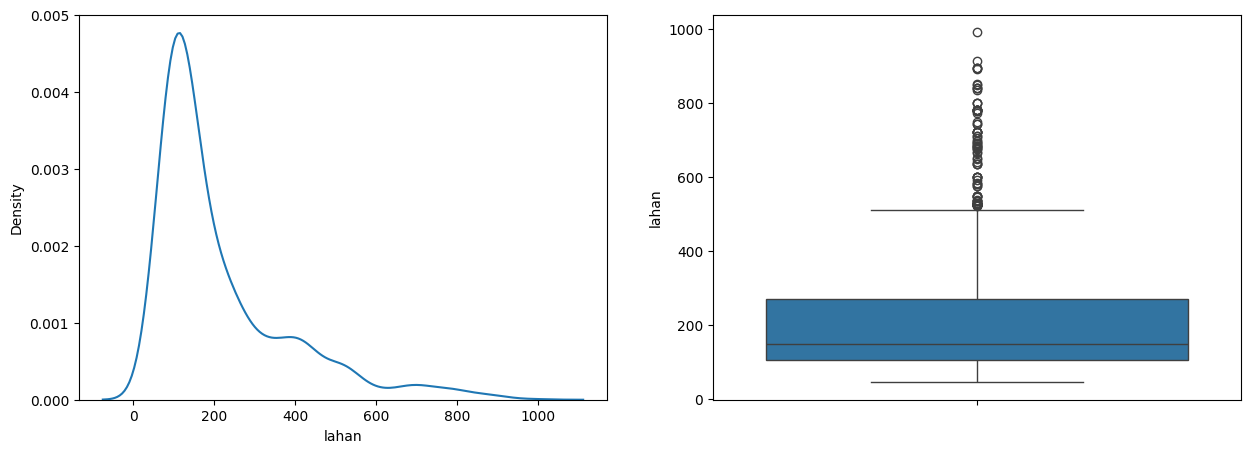

In [375]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.kdeplot(df['lahan'])
plt.subplot(1,2,2)
sns.boxplot(df['lahan'])
plt.show()

In [376]:
fasilitas = ['sistem_alarm', 'gym', 'internet_broadband/wifi', 'tv_kabel', 'pemanas_ruangan',
                'pendingin_ruangan_(ac)', 'air_panas', 'telepon', 'televisi', 'kitchen_set',
                'garasi', 'secure_parking', 'kolam_renang', 'lapangan_tenis', 'balkon',
                'dek', 'halaman_terbuka', 'area_hiburan_outdoor', 'pagar_penuh', 'taman',
                'keamanan_24_jam', 'taman_bermain_anak']

for col in fasilitas:
  print(col)
  print(df[col].value_counts())
  print("-------")

sistem_alarm
N    1329
Y      23
Name: sistem_alarm, dtype: int64
-------
gym
N    1341
Y      11
Name: gym, dtype: int64
-------
internet_broadband/wifi
N    1051
Y     301
Name: internet_broadband/wifi, dtype: int64
-------
tv_kabel
N    1128
Y     224
Name: tv_kabel, dtype: int64
-------
pemanas_ruangan
N    1332
Y      20
Name: pemanas_ruangan, dtype: int64
-------
pendingin_ruangan_(ac)
N    985
Y    367
Name: pendingin_ruangan_(ac), dtype: int64
-------
air_panas
N    1230
Y     122
Name: air_panas, dtype: int64
-------
telepon
N    1115
Y     237
Name: telepon, dtype: int64
-------
televisi
N    1099
Y     253
Name: televisi, dtype: int64
-------
kitchen_set
N    1151
Y     201
Name: kitchen_set, dtype: int64
-------
garasi
N    1009
Y     343
Name: garasi, dtype: int64
-------
secure_parking
N    1148
Y     204
Name: secure_parking, dtype: int64
-------
kolam_renang
N    1268
Y      84
Name: kolam_renang, dtype: int64
-------
lapangan_tenis
N    1342
Y      10
Name: lapangan_te

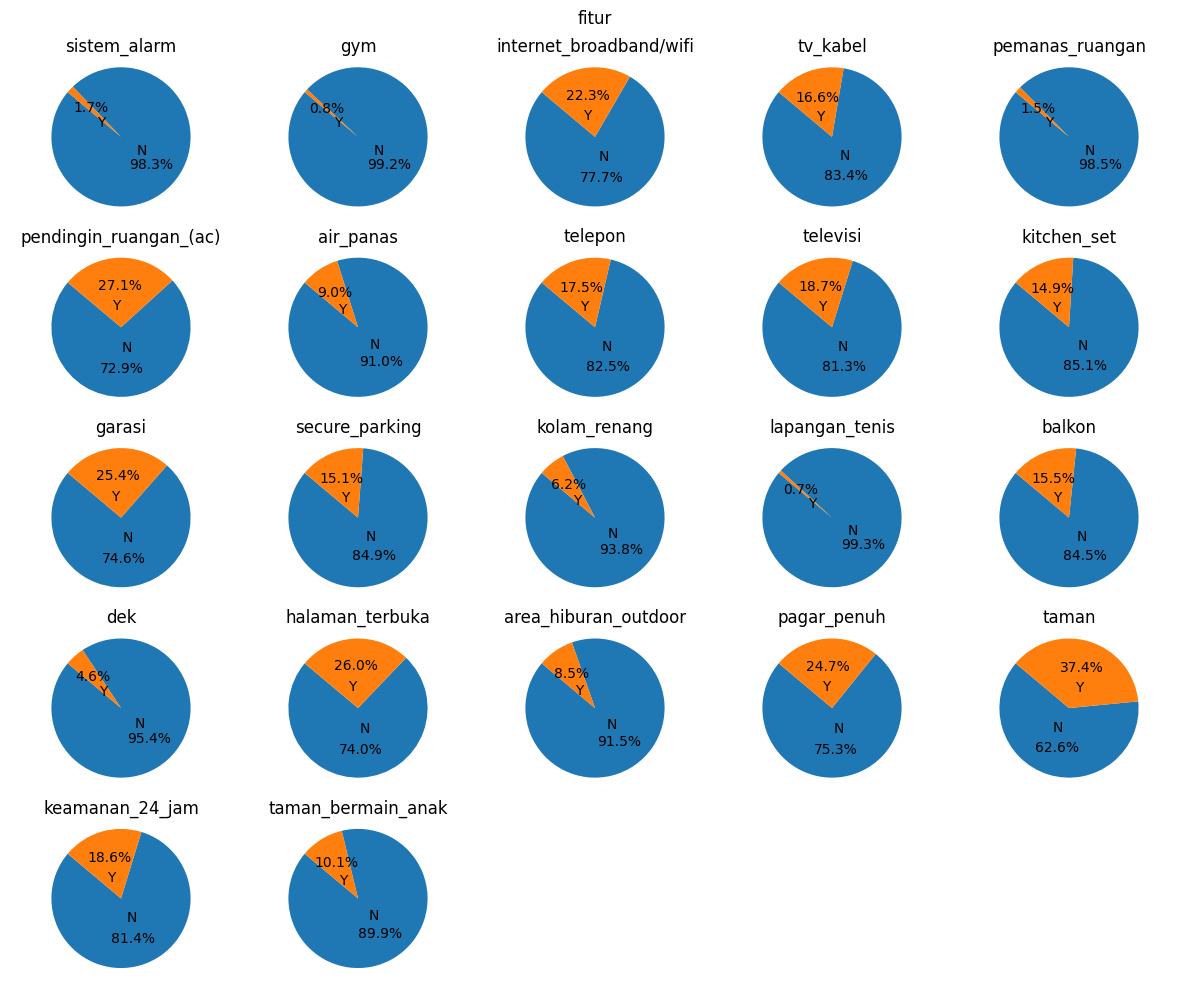

In [377]:
import numpy as np
# Menentukan jumlah subplot sesuai dengan jumlah kolom yang akan divisualisasikan
num_plots = len(fasilitas)
num_rows = int(np.ceil(np.sqrt(num_plots)))
num_cols = int(np.ceil(num_plots / num_rows))

# Membuat subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))
fig.suptitle('fitur')

# Flatten array dari subplot untuk mempermudah iterasi
axes = axes.flatten()

# Iterasi untuk setiap kolom dan membuat pie chart
for i, column in enumerate(fasilitas):
    ax = axes[i]
    category_counts = df[column].value_counts()

    ax.pie(category_counts,
           labels=category_counts.index,
           autopct='%1.1f%%',
           startangle=140,
           labeldistance=0.3)

    ax.set_title(f'{column}')
    ax.axis('equal')

# Menyembunyikan subplot yang tidak digunakan
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [378]:
tempat__ = ['malioboro',
    'masjid_jogokariyan',
    'malioboro_mall',
    'universitas_ahmad_dahlan',
    'terminal_giwangan',
    'universitas_gadjah_mada',
    'universitas_sarjanawiyata_tamansiswa',
    'universitas_pembangunan_nasional_veteran_yogyakarta',
    'lippo_plaza_jogja',
    'masjid_gedhe_kauman',
    'universitas_islam_indonesia',
    'sleman_city_hall',
    'institut_seni_indonesia_yogyakarta',
    'sekolah_tinggi_teknologi_adisutjipto',
    'universitas_jenderal_achmad_yani',
    'universitas_tidar',
    'jcm_jogja_city_mall',
    'ambarrukmo_plaza',
    'universitas_muhammadiyah_yogyakarta',
    'monumen_jogja_kembali',
    'stasiun_yogyakarta',
    'universitas_islam_negeri_sunan_kalijaga_yogyakarta',
    'universitas_teknologi_yogyakarta',
    'universitas_negeri_yogyakarta',
    'sman_1_teladan_yogyakarta',
    'rs_panti_nugroho',
    'galeria_mall',
    'rumah_sakit_jogja_international_hospital',
    'universitas_kristen_duta_wacana',
    'stasiun_tugu',
    'institut_sains_dan_teknologi_akprind',
    'tugu_yogyakarta',
    'unisa_jogja_universitas_aisyiyah',
    'universitas_atmajaya_yogyakarta',
    'rs_sardjito_yogyakarta',
    'sman_6_yogyakarta',
    'stmik_amikom_yogyakarta',
    'universitas_islam_negeri_sunan_kalijaga',
    'gereja_saint_francis_xaverius_yogyakarta',
    'sahid_j-walk',
    'rumah_sakit_panti_rapih',
    'universitas_sanata_dharma_yogyakarta',
    'sman_3_yogyakarta']

for col in tempat__:
  print(col)
  print(df[col].value_counts())
  print("-------")

malioboro
N    871
Y    481
Name: malioboro, dtype: int64
-------
masjid_jogokariyan
N    1128
Y     224
Name: masjid_jogokariyan, dtype: int64
-------
malioboro_mall
N    1095
Y     257
Name: malioboro_mall, dtype: int64
-------
universitas_ahmad_dahlan
N    1008
Y     344
Name: universitas_ahmad_dahlan, dtype: int64
-------
terminal_giwangan
N    982
Y    370
Name: terminal_giwangan, dtype: int64
-------
universitas_gadjah_mada
N    1316
Y      36
Name: universitas_gadjah_mada, dtype: int64
-------
universitas_sarjanawiyata_tamansiswa
N    1227
Y     125
Name: universitas_sarjanawiyata_tamansiswa, dtype: int64
-------
universitas_pembangunan_nasional_veteran_yogyakarta
N    1349
Y       3
Name: universitas_pembangunan_nasional_veteran_yogyakarta, dtype: int64
-------
lippo_plaza_jogja
N    1252
Y     100
Name: lippo_plaza_jogja, dtype: int64
-------
masjid_gedhe_kauman
N    945
Y    407
Name: masjid_gedhe_kauman, dtype: int64
-------
universitas_islam_indonesia
N    1346
Y       6
Na

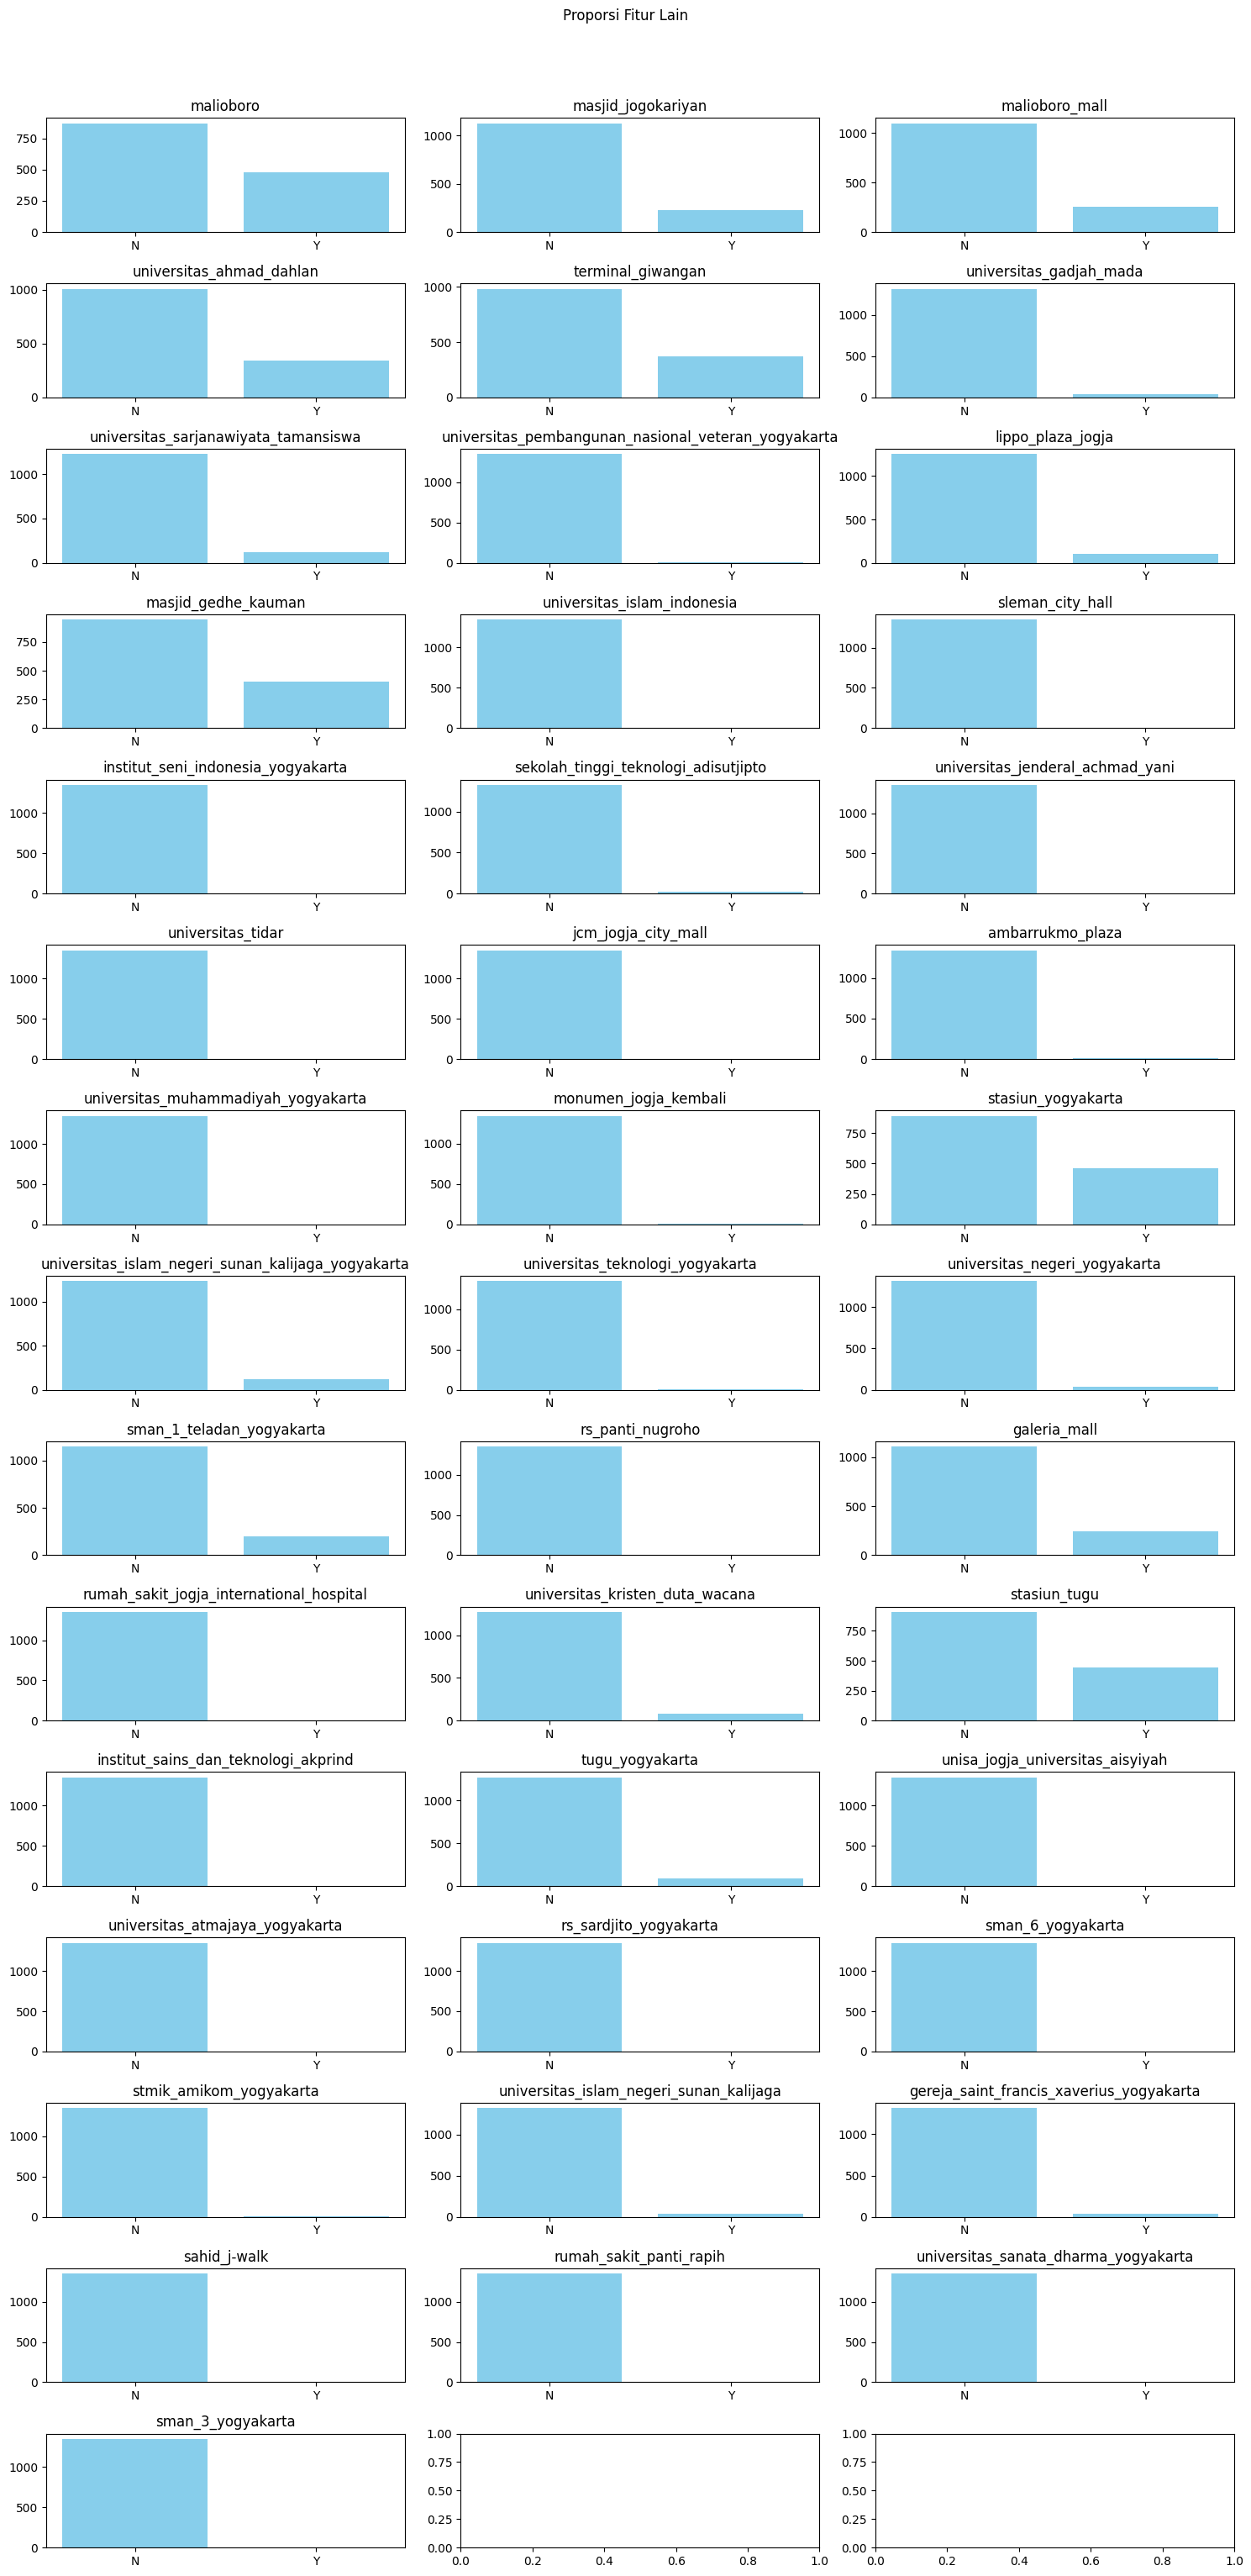

In [379]:
total_fitur = len(tempat__)
subplot_rows = int(np.ceil(total_fitur / 3))
subplot_cols = min(3, total_fitur)

fig, axes = plt.subplots(subplot_rows, subplot_cols, figsize=(15, 2 * subplot_rows))
fig.suptitle('Proporsi Fitur Lain', y=1.02)

# Flatten axes jika lebih dari satu baris
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < total_fitur:
        column = tempat__[i]
        category_counts = df[column].value_counts()

        ax.bar(category_counts.index,
               category_counts.values,
               tick_label=category_counts.index,
               color='skyblue')  # Ganti warna sesuai keinginan

        ax.set_title(f'{column}')
plt.tight_layout()
plt.show()

In [380]:
loc_mean = df.groupby('lokasi')['harga'].mean().reset_index().sort_values(by='harga',ascending=True)

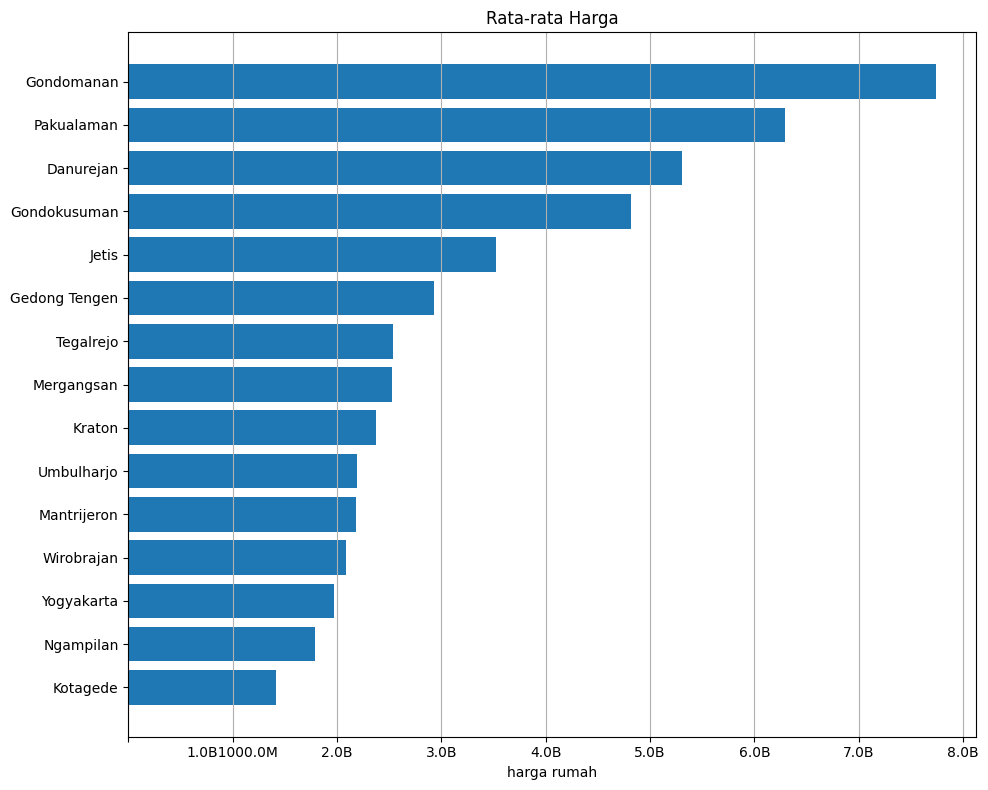

In [381]:
plt.figure(figsize=(10,8))
plt.barh(loc_mean['lokasi'],loc_mean['harga'])
plt.title('Rata-rata Harga')
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_price))
plt.xlabel('harga rumah')
plt.ylabel('')
plt.grid(axis='x')
labels,location = plt.xticks()
plt.tight_layout()
plt.show()

In [382]:
lokasi_harga_mean = df.groupby(['lokasi', 'alamat'])['harga'].mean().reset_index()
lokasi_harga_top10 = lokasi_harga_mean.head(10)
lokasi_harga_top10_sorted = lokasi_harga_top10.sort_values(by='harga', ascending=False)

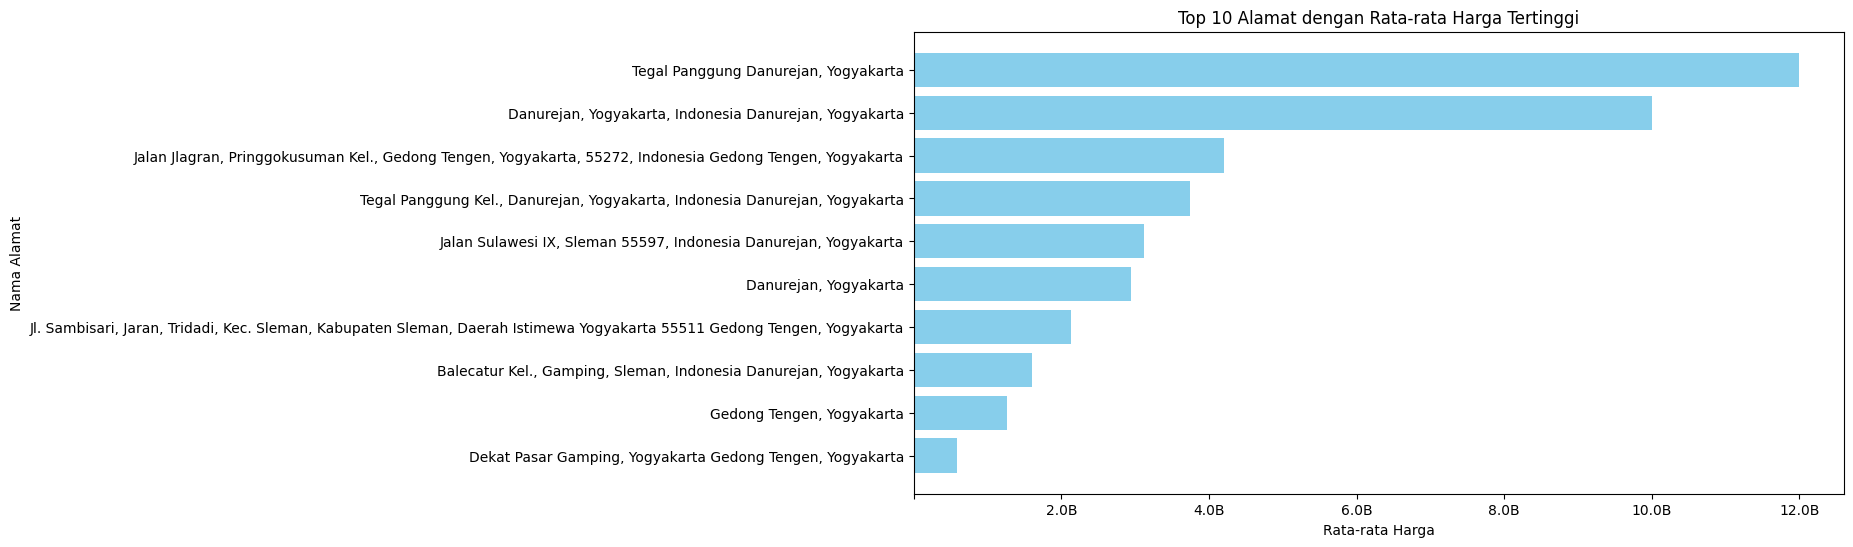

In [383]:
plt.figure(figsize=(12, 6))
plt.barh(lokasi_harga_top10_sorted['alamat'], lokasi_harga_top10_sorted['harga'], color='skyblue')
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_price))
plt.xlabel('Rata-rata Harga')
plt.ylabel('Nama Alamat')
plt.ylim(reversed(plt.ylim()))  # Membalik urutan pada sumbu y
plt.title('Top 10 Alamat dengan Rata-rata Harga Tertinggi')
plt.show()

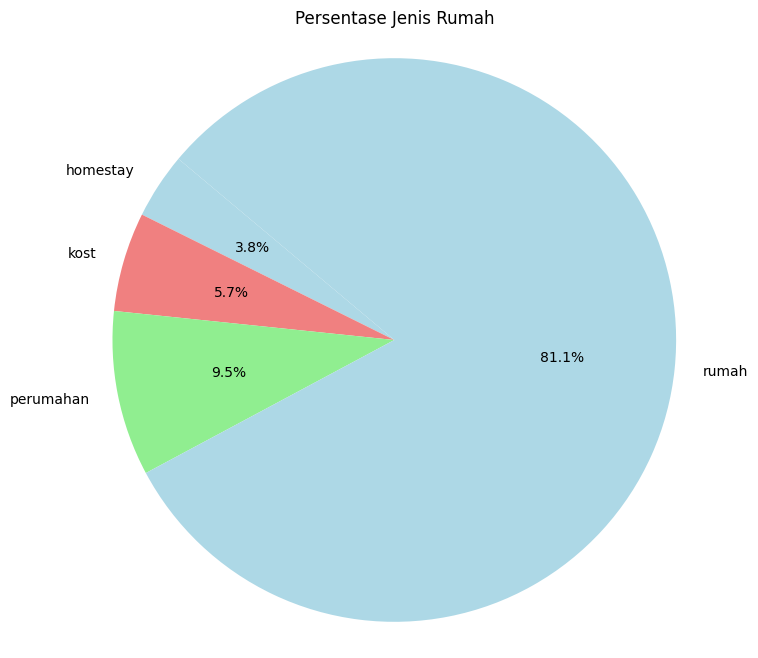

In [384]:
# Menghitung jumlah setiap jenis rumah
jenis_rumah_counts = dict(zip(*np.unique(df['jenis_rumah'], return_counts=True)))

# Menyiapkan data untuk visualisasi
labels = list(jenis_rumah_counts.keys())
values = list(jenis_rumah_counts.values())

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral', 'lightgreen'])
plt.axis('equal')  # Memastikan pie chart berbentuk lingkaran
plt.title('Persentase Jenis Rumah')
plt.show()

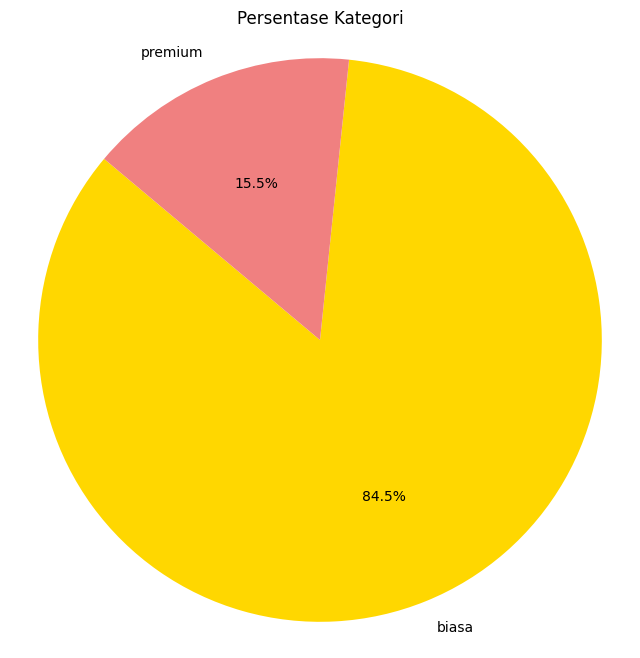

In [385]:
# Menghitung jumlah setiap kategori
kategori_counts = dict(zip(*np.unique(df['kategori'], return_counts=True)))

# Menyiapkan data untuk visualisasi
labels = list(kategori_counts.keys())
values = list(kategori_counts.values())

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=['gold', 'lightcoral'])
plt.axis('equal')  # Memastikan pie chart berbentuk lingkaran
plt.title('Persentase Kategori')
plt.show()

In [386]:
data =  df.drop(['latitude','longitude'],axis=1)

<ipython-input-387-a17a103adfd3>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



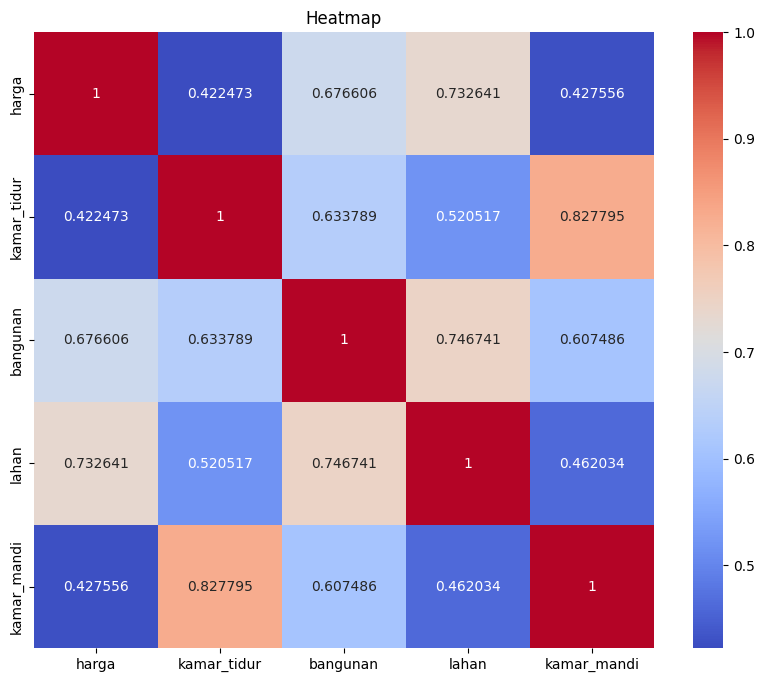

In [387]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='g')
plt.title('Heatmap')
plt.show()

In [388]:
df = df.reset_index(drop=True)
df.head()

,lokasi,harga,kamar_tidur,bangunan,lahan,alamat,kamar_mandi,sistem_alarm,gym,internet_broadband/wifi,...,universitas_islam_negeri_sunan_kalijaga,gereja_saint_francis_xaverius_yogyakarta,sahid_j-walk,rumah_sakit_panti_rapih,universitas_sanata_dharma_yogyakarta,sman_3_yogyakarta,jenis_rumah,kategori,latitude,longitude
0,Yogyakarta,8.250000e+08,2,40,66.0,Yogyakarta,2,N,N,N,...,N,N,N,N,N,N,rumah,premium,-7.801195,110.364917
1,Jetis,1.680000e+09,4,140,500.0,"Jetis, Yogyakarta",5,N,N,N,...,N,N,N,N,N,N,rumah,premium,-8.035127,110.490835
2,Yogyakarta,9.300000e+08,2,66,92.0,"Jalan Gedongan Kuning Selatan, Purbayan Kel., ...",2,N,N,N,...,N,N,N,N,N,N,rumah,premium,-7.801195,110.364917
3,Mergangsan,4.500000e+09,4,350,230.0,"jalan parangtritis jogja Mergangsan, Yogyakarta",4,Y,Y,Y,...,N,N,N,N,N,N,perumahan,premium,-7.814734,110.372558
4,Kraton,1.300000e+09,3,90,100.0,"Kraton, Yogyakarta",1,N,N,N,...,N,Y,N,N,N,N,rumah,biasa,-7.808799,110.362726


In [389]:
df.describe()

,harga,kamar_tidur,bangunan,lahan,kamar_mandi,latitude,longitude
count,1.352000e+03,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000
mean,2.456591e+09,4.501479,185.722633,217.065089,3.180473,-7.813948,110.377208
std,2.890280e+09,2.855254,144.238804,168.719333,2.496773,0.041840,0.025794
min,1.189210e+08,1.000000,20.000000,45.000000,1.000000,-8.035127,110.350447
25%,8.600000e+08,3.000000,80.000000,106.000000,2.000000,-7.818068,110.359723
50%,1.630767e+09,4.000000,150.000000,148.000000,3.000000,-7.814378,110.372558
75%,2.900000e+09,5.000000,247.000000,270.000000,4.000000,-7.801195,110.387374
max,2.800000e+10,23.000000,993.000000,992.000000,23.000000,-7.780455,110.490835


In [390]:
df.to_csv('jogja___.csv')